# 感知机

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import sys

In [2]:
def show(data,label,fig = None , ax = None):
    if not fig:
        fig = plt.figure()
    if not ax:
        ax = fig.add_subplot(111)
    X = data[:, 0]
    Y = data[:, 1]
    for i in range(len(label)):
        if label[i] > 0:
            ax.scatter(X[i].tolist(), Y[i].tolist(), color='red')
        else:
            ax.scatter(X[i].tolist(), Y[i].tolist(), color='green')
    return fig

### 数据——或

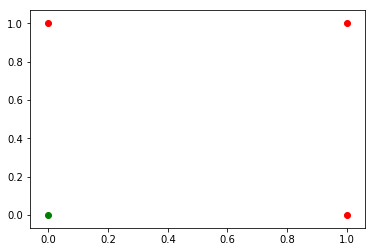

In [3]:
train_data = np.array([[1,0,1],[1,1,1],[0,0,1],[0,1,1]]) ##第三维度是bias

train_label = np.array([1,1,-1,1])

fig = show(train_data,train_label)


In [4]:
class perceptron(object):
    def __init__(self,lr= 0.001):
        #设定权值向量(w0,w1,w2),权值范围为-1,1
        self.W = (np.random.random(3)-0.5)

        #设定学习率
        self.lr = lr
        #计算迭代次数
        self.n=0;
        #神经网络输出
        self.O=0;


    def update(self,X,Y):
        self.n=self.n+1;
        O=np.sign(np.dot(X,self.W.T))##使用阶跃函数        
        #计算权值差
        W_Tmp = self.lr*((Y-O.T).dot(X))
        self.W = self.W+W_Tmp;

In [5]:
def train_once(x,y,save_name='line.gif',epoch = 100,lr = 0.001,mindata = -0.5,maxdata = 1.5):
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)

    # 询问图形在屏幕上的大小和DPI（每英寸点数）
    # 注意当把图形保存为文件时，需要为此单独再提供一个DPI
    # print('fig size: {0} DPI, size in inches {1}'.format(
    #     fig.get_dpi(), fig.get_size_inches()))

    p = perceptron(lr = lr)

    # 绘制一个保持不变（不会被重新绘制）的散点图以及初始直线
    show(x,y,fig,ax)
    xdata=np.linspace(mindata,maxdata)

    W = p.W

    k=-W[1]/W[0]
    d=-W[2]/W[0]

    line, = ax.plot(xdata, xdata*k+d, 'y-', linewidth=1)


    def update(i):

        p.update(x,y)
        label = 'timestep {0}'.format(i)
    #     print(label)
        # 更新直线和轴（用一个新X轴标签）
        # 以元组形式返回这一帧需要重新绘制的物体
        W = p.W

        k= -W[1]/W[0]
        d= -W[2]/W[0]

        line.set_ydata(xdata*k+d)
        ax.set_xlabel(label)
        return line, ax
    anim = FuncAnimation(fig, update, frames=np.arange(0, epoch), interval=200)

    anim.save(save_name, dpi=100, writer='imagemagick')

/dl_data/zhouyang/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


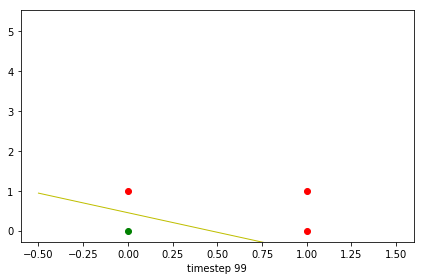

In [6]:
train_once(x = train_data,y = train_label,save_name = "line_lr_0_1.gif",lr = 1)

/dl_data/zhouyang/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


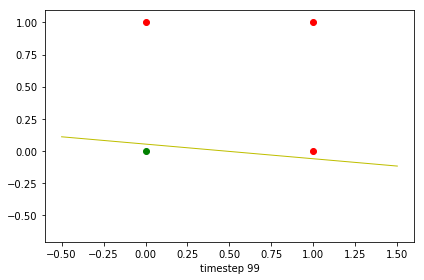

In [7]:
train_once(x = train_data,y = train_label,save_name = "line_lr_0_01.gif",lr = 0.01)

/dl_data/zhouyang/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


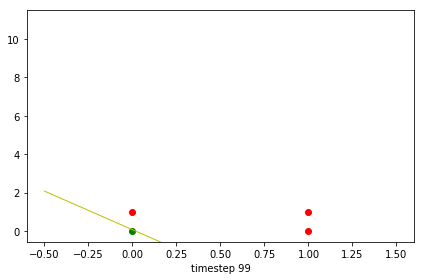

In [8]:
train_once(x = train_data,y = train_label,save_name = "line_lr_0_05.gif",lr = 0.05)

### 结果

<img src = "line1.gif"/>
* lr = 0.1

<img src = "line2.gif"/>
* lr = 0.05

<img src = "line3.gif"/>
* lr = 0.01

## 更多数据尝试

In [9]:
f = open('ex4x.dat','r+')
x = f.readlines()
x = np.array([[float(ii) for ii in i.strip('\n').split()]  for i in x]) ##去换行符
f = open('ex4y.dat','r+')
y = f.readlines()
y = np.array([ float(i.strip('\n'))  for i in y]) ##去换行符
figure = plt.figure()

##归一化

y[y == 0] = -1.0
m = len(y)
x1 = x[:,0]
x2 = x[:,1]
x = np.array([x1,x2,np.ones(m)])
x = x.T
y = y.T
##normalization
mu = np.array([np.mean(x[:,0]),np.mean(x[:,1])])
sigma = np.array([np.std(x[:,0]),np.std(x[:,1])])
print(sigma)
x[:,0] = (x[:,0] - mu[0])/sigma[0]
x[:,1] = (x[:,1] - mu[1])/sigma[1]

x1 = x[:,0]
x2 = x[:,1]

[9.86103443 9.82161002]


<Figure size 432x288 with 0 Axes>

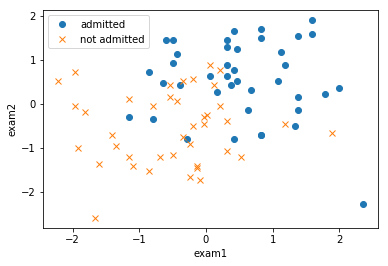

In [10]:
plt.plot( x[np.where(y == 1.0)][:,0],x[np.where(y == 1.0)][:,1],'o',label = 'admitted')
plt.plot( x[np.where(y == -1.0)][:,0],x[np.where(y == -1.0)][:,1],'x',label = 'not admitted')
plt.legend()
plt.xlabel("exam1")
plt.ylabel("exam2")

plt.savefig('dataaa2.png')

### 数据
<img src = "dataaa2.png">

/dl_data/zhouyang/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


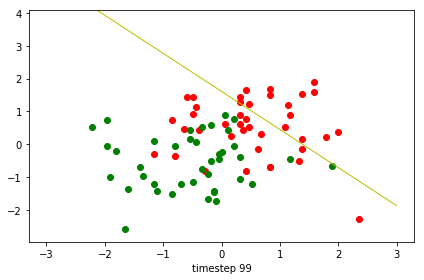

In [11]:
train_once(x = x,y = y,save_name = "line4.gif",lr = 0.001,mindata = -3,maxdata = 3)

### 结果
<img src = "line5.gif"/>